In [2]:
from transformers import (
    HubertForSequenceClassification,
    HubertModel,
    HubertPreTrainedModel,
    Wav2Vec2FeatureExtractor,
)

from transformers.modeling_outputs import SequenceClassifierOutput

import librosa
import numpy as np
import pandas as pd
import torch

In [3]:
models_list = [
    "models/2000-samples/hubert-base-dusha-ft-0-layers", # 0
    "models/2000-samples/hubert-base-dusha-ft-12-layers", # 1
    "models/2000-samples/hubert-base-dusha-ft-12-layers-5ep", # 2
    "models/2000-samples/hubert-base-dusha-ft-12-layers-10ep", # 3
    "models/2000-samples/hubert-base-dusha-ft-12-layers-15ep", # 4
    "models/8000-samples/hubert-base-dusha-ft-12-layers-3ep-8k", # 5
    "models/8000-samples/hubert-base-dusha-ft-12-layers-5ep-8k", # 6
    "models/hubert-base-dusha-ft-bin-clf", # 7
    "models/hubert-base-dusha-ft-bin-clf-1000", # 8
    "models/hubert-base-dusha-ft-bin-clf-1000-after-triplets-3000", # 9
    "models/hubert-base-dusha-ft-bin-clf-after-triplets-4000", # 10
    "models/hubert-base-dusha-ft-bin-clf-1000-after-triplets-1000/", # 11
    "models/hubert-base-dusha-ft-bin-clf-1000-after-triplets-2000/", # 12
    "models/hubert-base-dusha-ft-bin-clf-1000-5ep/", # 13
]

In [101]:
model_id = models_list[7]

model = HubertForSequenceClassification.from_pretrained(
    model_id,
    local_files_only=True,
    output_hidden_states=True
)

In [109]:
model_id = models_list[10]

model = HubertClassificationAfterTriplet.from_pretrained(
    model_id,
    local_files_only=True,
    output_hidden_states=True
)

In [8]:
# labels_names = ["neutral", "angry", "positive", "sad"]
labels_names = ["positive", "sad"]
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")
sampling_rate = feature_extractor.sampling_rate

# predictions = torch.argmax(output.logits, dim=-1)
# print(labels_names[predictions.numpy()[0]])

In [8]:
df = pd.read_csv("../data/crowd_test_500.csv")
df.head()

id  \
0  9e9961c53ca6eeb440b217e539fbf46c   
1  0166f65a30354db8282682b1a280e64c   
2  d49a6b560155831725a7bdc7d0a96099   
3  c6852b0925797612d7b6724da8cbe7b4   
4  64a7aa17132c3e4b7be1aaed5fc88090   

                                          audio_path  \
0  dusha/crowd/crowd_test/wavs/9e9961c53ca6eeb440...   
1  dusha/crowd/crowd_test/wavs/0166f65a30354db828...   
2  dusha/crowd/crowd_test/wavs/d49a6b560155831725...   
3  dusha/crowd/crowd_test/wavs/c6852b0925797612d7...   
4  dusha/crowd/crowd_test/wavs/64a7aa17132c3e4b7b...   

                                       features_path   emotion  label  \
0  dusha/features/9e9961c53ca6eeb440b217e539fbf46...   neutral      0   
1  dusha/features/0166f65a30354db8282682b1a280e64...   neutral      0   
2  dusha/features/d49a6b560155831725a7bdc7d0a9609...   neutral      0   
3  dusha/features/c6852b0925797612d7b6724da8cbe7b...   neutral      0   
4  dusha/features/64a7aa17132c3e4b7be1aaed5fc8809...  positive      2   

   duration  
0      5.82  
1      3.70  
2      4.38  
3      8.58  
4      5.06

In [105]:
# train_df = pd.read_csv("../data/crowd_train_bin_500.csv")
train_df = pd.read_csv("../data/crowd_train_bin_2000.csv")
test_df = pd.read_csv("../data/crowd_test_bin_500.csv")

In [22]:
train_df

id  \
0    7b78ca15946bddcf4c02843f9c5bda17   
1    ed5a0505897b5fd7fdd36e75e336e746   
2    347885402c51771785fad1b868b8a484   
3    bb83b6d620f8b47a3fc3d58ed4e55106   
4    e9a89b982685050c9a7d91ffb2e7ca23   
..                                ...   
995  e6c522ab70e6e4902ee5c5e0345a8ab0   
996  68bbabc12dc43cb7f629239175c75dc6   
997  41fd84b48da86acc41c4c06ed1dca057   
998  956ba1f4f2a1da12b8b6678fe7f7e1de   
999  51e946db673f6abec583e55ce44c9065   

                                            audio_path  \
0    dusha/crowd/crowd_train/wavs/7b78ca15946bddcf4...   
1    dusha/crowd/crowd_train/wavs/ed5a0505897b5fd7f...   
2    dusha/crowd/crowd_train/wavs/347885402c5177178...   
3    dusha/crowd/crowd_train/wavs/bb83b6d620f8b47a3...   
4    dusha/crowd/crowd_train/wavs/e9a89b982685050c9...   
..                                                 ...   
995  dusha/crowd/crowd_train/wavs/e6c522ab70e6e4902...   
996  dusha/crowd/crowd_train/wavs/68bbabc12dc43cb7f...   
997  dusha/crowd/crowd_train/wavs/41fd84b48da86acc4...   
998  dusha/crowd/crowd_train/wavs/956ba1f4f2a1da12b...   
999  dusha/crowd/crowd_train/wavs/51e946db673f6abec...   

                                         features_path   emotion  label  \
0    dusha/features/7b78ca15946bddcf4c02843f9c5bda1...       sad      3   
1    dusha/features/ed5a0505897b5fd7fdd36e75e336e74...  positive      2   
2    dusha/features/347885402c51771785fad1b868b8a48...  positive      2   
3    dusha/features/bb83b6d620f8b47a3fc3d58ed4e5510...  positive      2   
4    dusha/features/e9a89b982685050c9a7d91ffb2e7ca2...  positive      2   
..                                                 ...       ...    ...   
995  dusha/features/e6c522ab70e6e4902ee5c5e0345a8ab...       sad      3   
996  dusha/features/68bbabc12dc43cb7f629239175c75dc...       sad      3   
997  dusha/features/41fd84b48da86acc41c4c06ed1dca05...       sad      3   
998  dusha/features/956ba1f4f2a1da12b8b6678fe7f7e1d...       sad      3   
999  dusha/features/51e946db673f6abec583e55ce44c906...       sad      3   

     duration  
0    4.840000  
1    5.260000  
2    5.180000  
3    2.410312  
4    3.340000  
..        ...  
995  4.480000  
996  8.280000  
997  5.572375  
998  2.773000  
999  5.460000  

[1000 rows x 6 columns]

In [23]:
test_df

id  \
0    64a7aa17132c3e4b7be1aaed5fc88090   
1    33152583dcbf1fe40d142954a2a7ca23   
2    edde29c071343653eced8877747ed54b   
3    952113a7bb4f28a9de885187dd0fe90e   
4    083486716bff8bcad5a72de4de4f2ba9   
..                                ...   
995  ab09ff1c06271fc62f670fe69c12cc50   
996  e2f66e2722c15bc0ff6fd540a7cdf3f9   
997  372542365a52864d5047e6390cc246b3   
998  d6f818cbc0d56b053893dc5ce116d246   
999  ab999376759c786616043feec57e1e2b   

                                            audio_path  \
0    dusha/crowd/crowd_test/wavs/64a7aa17132c3e4b7b...   
1    dusha/crowd/crowd_test/wavs/33152583dcbf1fe40d...   
2    dusha/crowd/crowd_test/wavs/edde29c071343653ec...   
3    dusha/crowd/crowd_test/wavs/952113a7bb4f28a9de...   
4    dusha/crowd/crowd_test/wavs/083486716bff8bcad5...   
..                                                 ...   
995  dusha/crowd/crowd_test/wavs/ab09ff1c06271fc62f...   
996  dusha/crowd/crowd_test/wavs/e2f66e2722c15bc0ff...   
997  dusha/crowd/crowd_test/wavs/372542365a52864d50...   
998  dusha/crowd/crowd_test/wavs/d6f818cbc0d56b0538...   
999  dusha/crowd/crowd_test/wavs/ab999376759c786616...   

                                         features_path   emotion  label  \
0    dusha/features/64a7aa17132c3e4b7be1aaed5fc8809...  positive      2   
1    dusha/features/33152583dcbf1fe40d142954a2a7ca2...  positive      2   
2    dusha/features/edde29c071343653eced8877747ed54...  positive      2   
3    dusha/features/952113a7bb4f28a9de885187dd0fe90...  positive      2   
4    dusha/features/083486716bff8bcad5a72de4de4f2ba...  positive      2   
..                                                 ...       ...    ...   
995  dusha/features/ab09ff1c06271fc62f670fe69c12cc5...       sad      3   
996  dusha/features/e2f66e2722c15bc0ff6fd540a7cdf3f...       sad      3   
997  dusha/features/372542365a52864d5047e6390cc246b...       sad      3   
998  dusha/features/d6f818cbc0d56b053893dc5ce116d24...       sad      3   
999  dusha/features/ab999376759c786616043feec57e1e2...       sad      3   

     duration  
0    5.060000  
1    7.600000  
2    5.720000  
3    5.240000  
4    4.120000  
..        ...  
995  4.620000  
996  3.260000  
997  3.178313  
998  2.135813  
999  8.820000  

[1000 rows x 6 columns]

In [33]:
n_samples = 500
df_reduce = df.groupby(['emotion']).head(n_samples).reset_index(drop=True)
df_reduce[['emotion']].groupby('emotion').value_counts()

emotion
angry       500
neutral     500
positive    500
sad         500
Name: count, dtype: int64

In [5]:
import torch.nn as nn
from torch.nn import CrossEntropyLoss

class HubertClassificationAfterTriplet(HubertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)

        self.config = config

        self.hubert = HubertModel(config)
        self.fc1 = nn.Linear(config.hidden_size, config.classifier_proj_size)
        self.classifier = nn.Linear(config.classifier_proj_size, config.num_labels)

        self.post_init()

    def forward(
        self,
        input_values,
        labels=None,
        attention_mask=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        return_loss=True,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        output_hidden_states = True if self.config.use_weighted_layer_sum else output_hidden_states

        outputs = self.hubert(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        relu = nn.ReLU(inplace=True)

        hidden_state = outputs.last_hidden_state
        hidden_state = self.fc1(hidden_state.mean(dim=1))
        hidden_state = relu(hidden_state)
        logits = self.classifier(hidden_state)

        loss = None
        if labels is not None:
            loss_fn = CrossEntropyLoss()
            loss = loss_fn(logits.view(-1, self.config.num_labels), labels.view(-1))

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [11]:
# Получение выхода с модели
def get_output_for_audio(audio, feature_extractor, model, sampling_rate=16000):
    audio_array = librosa.load(
        audio,
        sr=sampling_rate,
        mono=False
    )[0]
    
    input_values = feature_extractor(
        audio_array,
        sampling_rate=sampling_rate,
        return_tensors="pt"
    ).input_values

    output = model(input_values)

    return output

# Получение массива со средними значениями признаков каждого аудиофайла
def get_mean_features_and_labels(df, model, feature_extractor, sampling_rate=16000):
    output = get_output_for_audio(f'../{df["audio_path"][0]}', feature_extractor, model, sampling_rate)
    hidden_state = output.hidden_states[-1].detach().numpy()[0]
    hidden_state = hidden_state.mean(axis=0)

    features_list = [[hidden_state]]
    labels_list = [df['label'][0]]

    for index, row in df.iterrows():
        if (index == 0):
            continue
        
        output = get_output_for_audio(f'../{row["audio_path"]}', feature_extractor, model, sampling_rate)
        hidden_state = output.hidden_states[-1].detach().numpy()[0]
        hidden_state = hidden_state.mean(axis=0)
        
        features_list.append([hidden_state])
        labels_list.append(row['label'])
    
    data = np.concatenate(features_list)
    labels = np.array(labels_list)
    
    return data, labels

# Получение массива со значениями признаков
def get_features_and_labels(df, model, feature_extractor, sampling_rate=16000):
    output = get_output_for_audio(f'../{df["audio_path"][0]}', feature_extractor, model, sampling_rate)
    hidden_state = output.hidden_states[-1].detach().numpy()[0]
    
    features_list = [hidden_state]
    labels_list = [[df['label'][0] for _ in range(hidden_state.shape[0])]]

    for index, row in df.iterrows():
        if (index == 0):
            continue
        
        output = get_output_for_audio(f'../{row["audio_path"]}', feature_extractor, model, sampling_rate)
        hidden_state = output.hidden_states[-1].detach().numpy()[0]

        features_list.append(hidden_state)
        labels_list.append([row['label'] for _ in range(hidden_state.shape[0])])
    
    data = np.concatenate(features_list)
    labels = np.concatenate(labels_list)
    
    return data, labels

def get_logits_and_labels(df, model, feature_extractor, sampling_rate=16000):
    output = get_output_for_audio(f'../{df["audio_path"][0]}', feature_extractor, model, sampling_rate)
    logits = output['logits'].detach().numpy()[0]

    logits_list = [[logits]]
    labels_list = [df['label'][0]]

    for index, row in df.iterrows():
        if (index == 0):
            continue
        
        output = get_output_for_audio(f'../{row["audio_path"]}', feature_extractor, model, sampling_rate)
        logits = output['logits'].detach().numpy()[0]
        
        logits_list.append([logits])
        labels_list.append(row['label'])
    
    data = np.concatenate(logits_list)
    labels = np.array(labels_list)
    
    return data, labels

## Визуализация результатов

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_theme(style="whitegrid", palette="Paired")

import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [71]:
import matplotlib as mpl
import matplotlib.colors as mcolors

def color_map_color(value, cmap_name='viridis', vmin=0, vmax=1):
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = mpl.colormaps[cmap_name]
    rgb = cmap(norm(abs(value)))[:3]
    color = mcolors.rgb2hex(rgb)
    return color

def get_patches(colormap='viridis'):
    pathches = [
        # mpatches.Patch(color=color_map_color(0, colormap, 0, 3), label='neutral'),
        # mpatches.Patch(color=color_map_color(1, colormap, 0, 3), label='angry'),
        # mpatches.Patch(color=color_map_color(2, colormap, 0, 3), label='positive'),
        # mpatches.Patch(color=color_map_color(3, colormap, 0, 3), label='sad'),
        mpatches.Patch(color=color_map_color(0, colormap, 0, 1), label='positive'),
        mpatches.Patch(color=color_map_color(1, colormap, 0, 1), label='sad'),
    ]

    return pathches

def plot_2d(data, labels, title=""):
    pca_2d = PCA(n_components=2)
    pca_2d_data = pca_2d.fit_transform(data)

    fig, ax = plt.subplots()
    ax.scatter(x=pca_2d_data[:, 0], y=pca_2d_data[:, 1], c=labels, cmap='viridis')
    
    ax.legend(handles=get_patches())
    ax.set_title(title)
    
    plt.show()

def plot_bin_clf(data, labels, title=""):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    
    fig, ax = plt.subplots()
    
    ax.scatter(x=pca_data[labels == 2, 0], y=pca_data[labels == 2, 1], marker="o", label="positive", color='g')
    ax.scatter(x=pca_data[labels == 3, 0], y=pca_data[labels == 3, 1], marker="x", label="sad", color='r')
    ax.legend()
    
    ax.set_title(title)
    
    plt.show()

def plot_3d(data, labels, title=""):
    pca_3d = PCA(n_components=3)
    pca_3d_data = pca_3d.fit_transform(data)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    ax.scatter(xs=pca_3d_data[:, 0], ys=pca_3d_data[:, 1], zs=pca_3d_data[:, 2], c=labels, cmap='viridis')
    ax.legend(handles=get_patches())
    ax.set_title(title)
        
    plt.show()

### Бинарная классификация

In [86]:
# train_data, train_labels = get_logits_and_labels(train_df, model, feature_extractor, sampling_rate)
# test_data, test_labels = get_logits_and_labels(test_df, model, feature_extractor, sampling_rate)

In [99]:
train_data, train_labels = get_mean_features_and_labels(train_df, model, feature_extractor, sampling_rate)
test_data, test_labels = get_mean_features_and_labels(test_df, model, feature_extractor, sampling_rate)

In [106]:
n_samples = 500
df_reduce = train_df.groupby(['emotion']).sample(n_samples).reset_index(drop=True)

In [110]:
train_data, train_labels = get_mean_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
test_data, test_labels = get_mean_features_and_labels(test_df, model, feature_extractor, sampling_rate)

#### models/hubert-base-dusha-ft-bin-clf-1000-after-triplets-1000

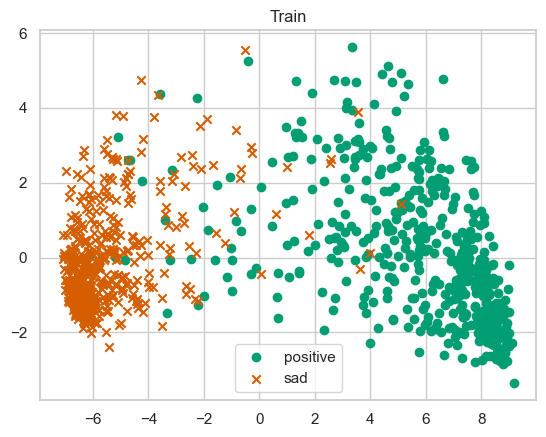

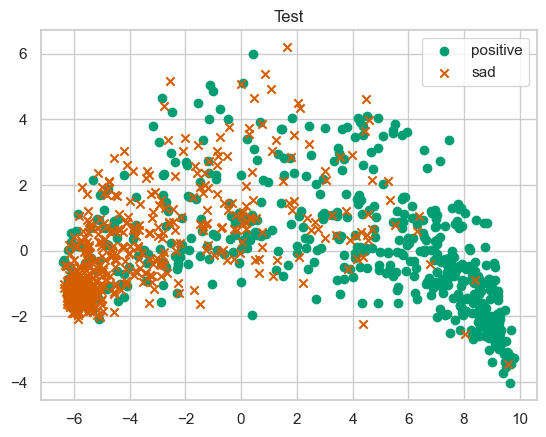

In [89]:
# Mean encoder output
plot_bin_clf(train_data, train_labels, f"Train")
plot_bin_clf(test_data, test_labels, f"Test")

#### models/hubert-base-dusha-ft-bin-clf-1000-after-triplets-2000

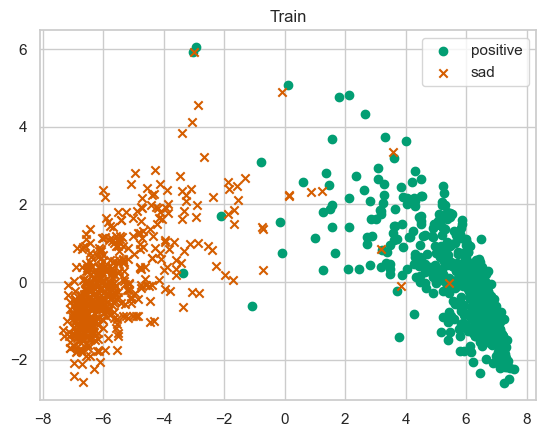

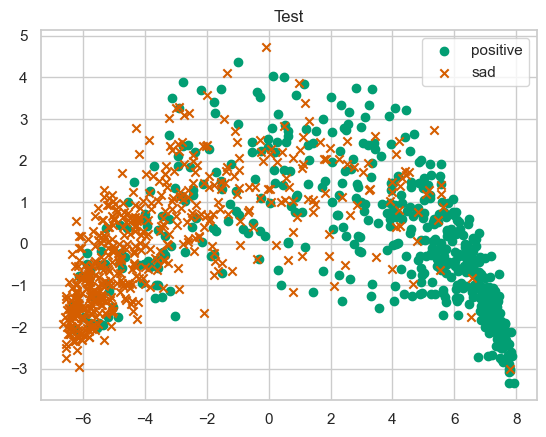

In [83]:
# Mean encoder output
plot_bin_clf(train_data, train_labels, f"Train")
plot_bin_clf(test_data, test_labels, f"Test")

#### models/hubert-base-dusha-ft-bin-clf-1000-after-triplets-3000

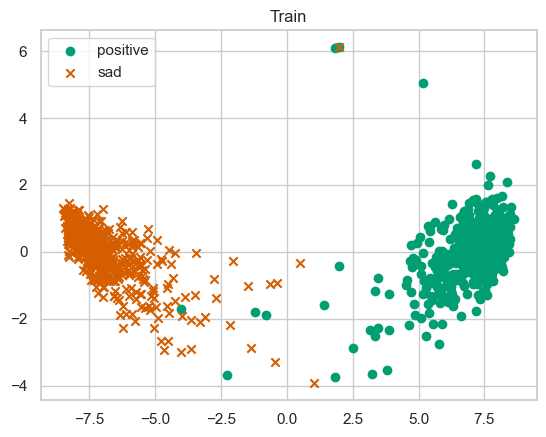

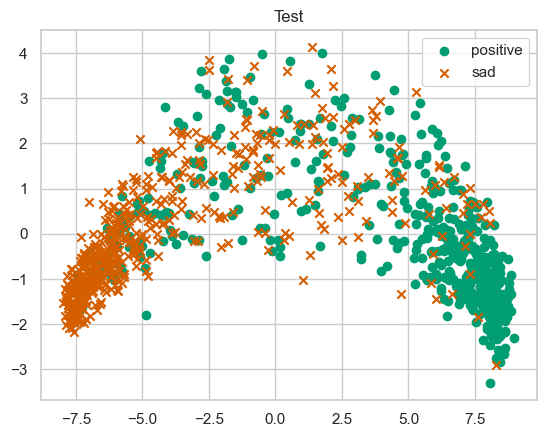

In [92]:
# Mean encoder output
plot_bin_clf(train_data, train_labels, f"Train")
plot_bin_clf(test_data, test_labels, f"Test")

#### models/hubert-base-dusha-ft-bin-clf-after-triplets-4000

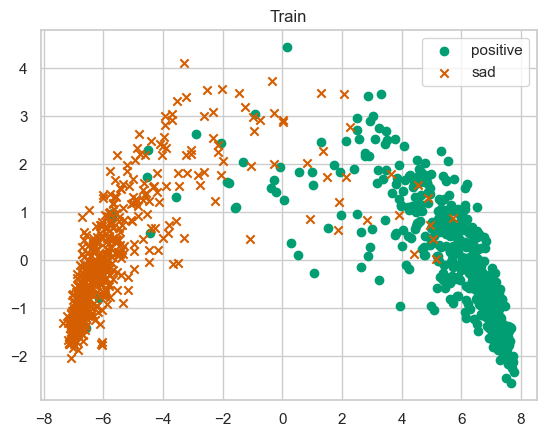

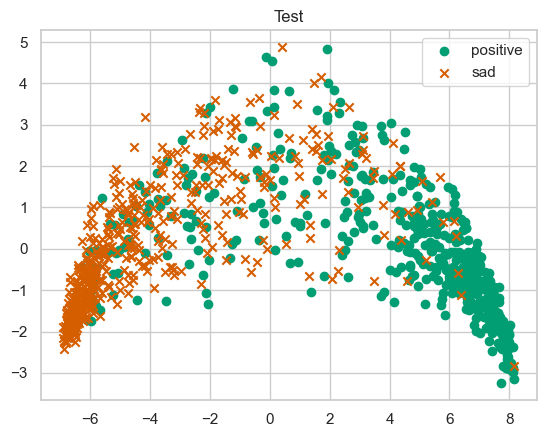

In [111]:
# Mean encoder output
plot_bin_clf(train_data, train_labels, f"Train")
plot_bin_clf(test_data, test_labels, f"Test")

#### models/hubert-base-dusha-ft-bin-clf-1000-3ep

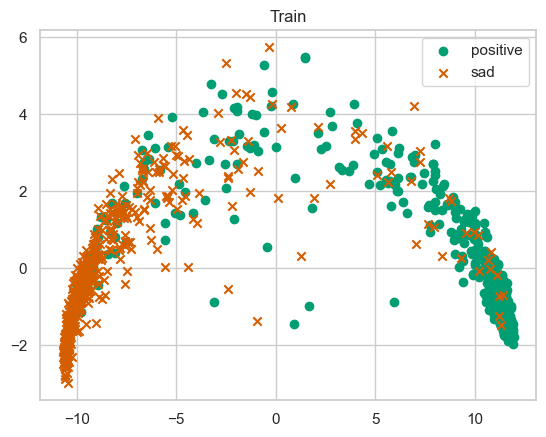

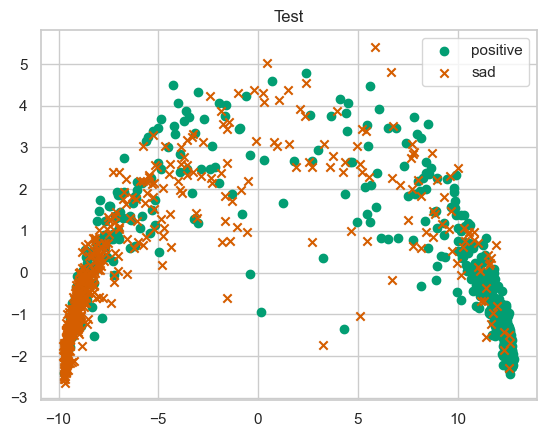

In [100]:
# Mean encoder output
plot_bin_clf(train_data, train_labels, f"Train")
plot_bin_clf(test_data, test_labels, f"Test")

#### models/hubert-base-dusha-ft-bin-clf-1000-5ep

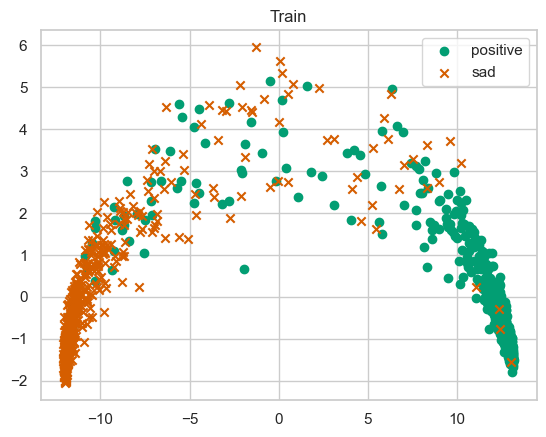

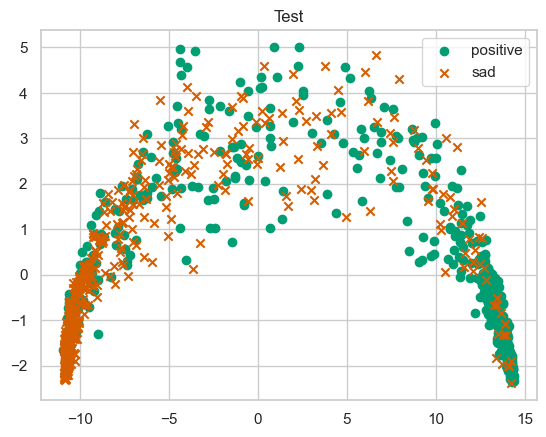

In [96]:
# Mean encoder output
plot_bin_clf(train_data, train_labels, f"Train")
plot_bin_clf(test_data, test_labels, f"Test")

### models/hubert-base-dusha-ft-bin-clf

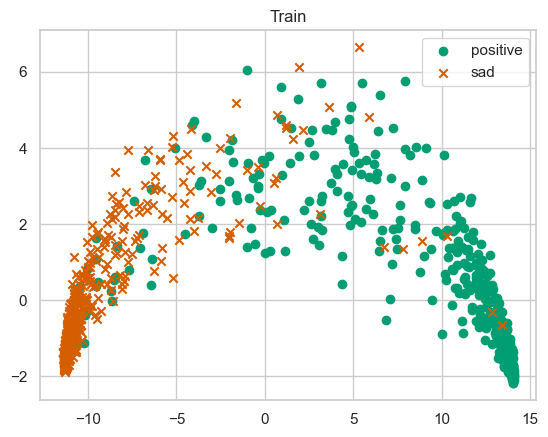

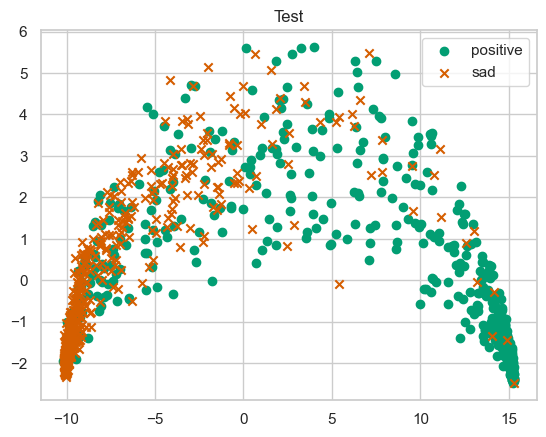

In [108]:
# Mean encoder output
plot_bin_clf(train_data, train_labels, f"Train")
plot_bin_clf(test_data, test_labels, f"Test")

---

#### models/hubert-base-dusha-ft-bin-clf-1000

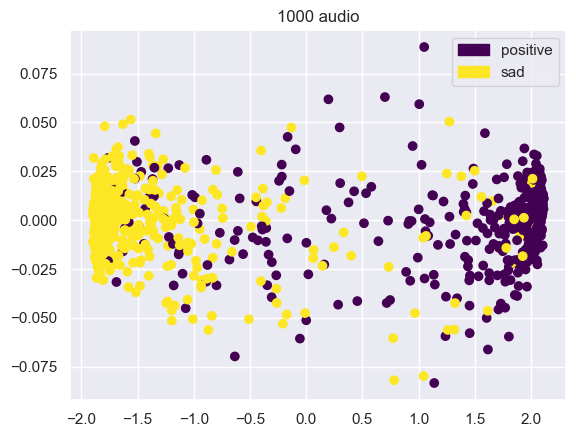

In [28]:
data, labels = get_logits_and_labels(train_df, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

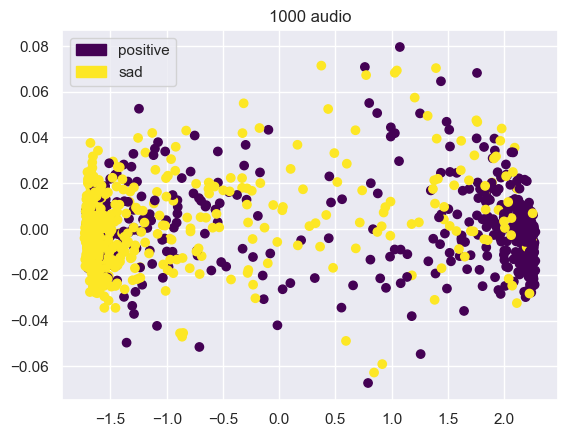

In [18]:
data, labels = get_logits_and_labels(test_df, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

#### models/hubert-base-dusha-ft-bin-clf-4000

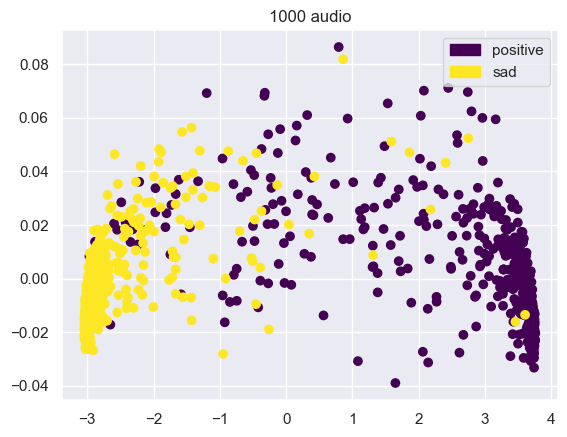

In [10]:
n_samples = 500
df_reduce = train_df.groupby(['emotion']).sample(n_samples).reset_index(drop=True)

data, labels = get_logits_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

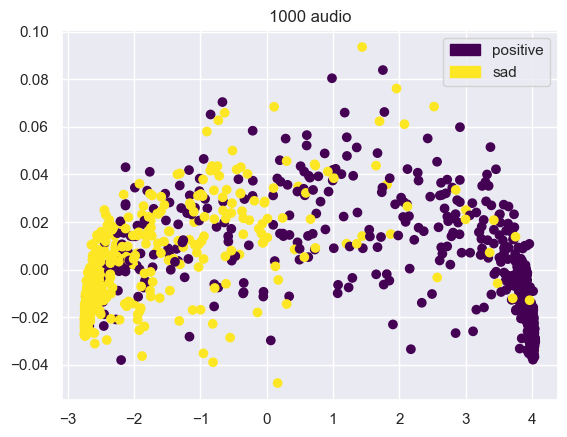

In [11]:
data, labels = get_logits_and_labels(test_df, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

#### models/hubert-base-dusha-ft-bin-clf-1000-after-triplets-3000

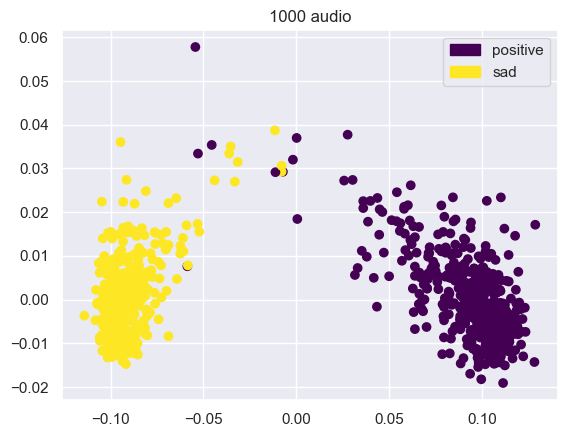

In [26]:
data, labels = get_logits_and_labels(train_df, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

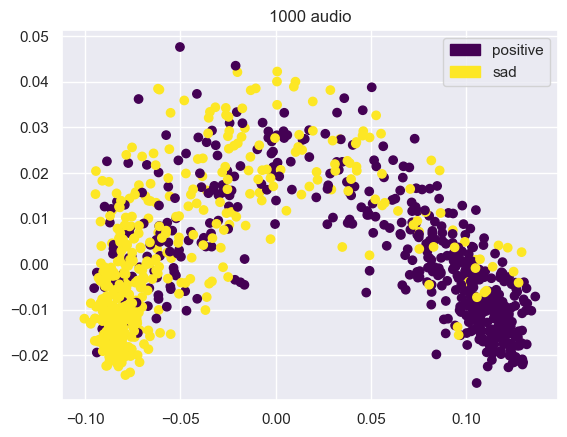

In [25]:
data, labels = get_logits_and_labels(test_df, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

#### models/hubert-base-dusha-ft-bin-clf-after-triplets-4000

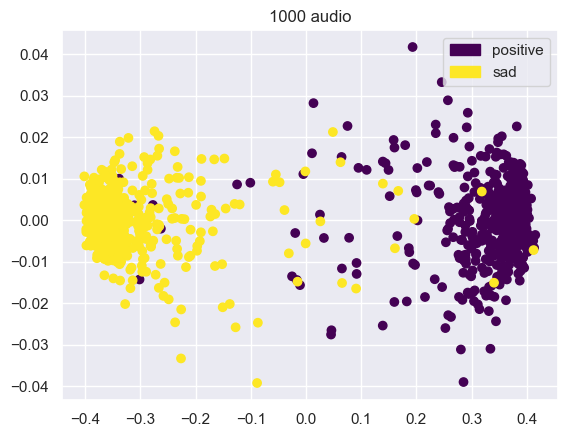

In [14]:
# n_samples = 500
# df_reduce = train_df.groupby(['emotion']).sample(n_samples).reset_index(drop=True)

data, labels = get_logits_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

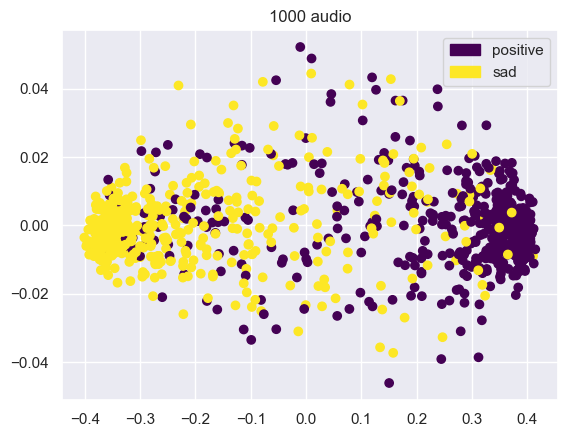

In [15]:
data, labels = get_logits_and_labels(test_df, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"1000 audio")

-----

In [19]:
n_samples = 150
df_reduce = test_df.groupby(['emotion']).head(n_samples).reset_index(drop=True)

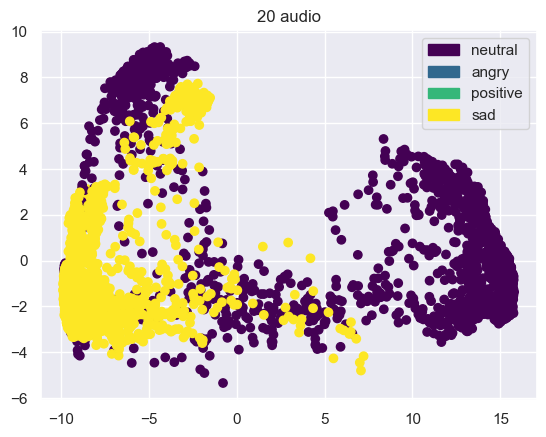

In [18]:
data, labels = get_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"{n_samples * 2} audio")

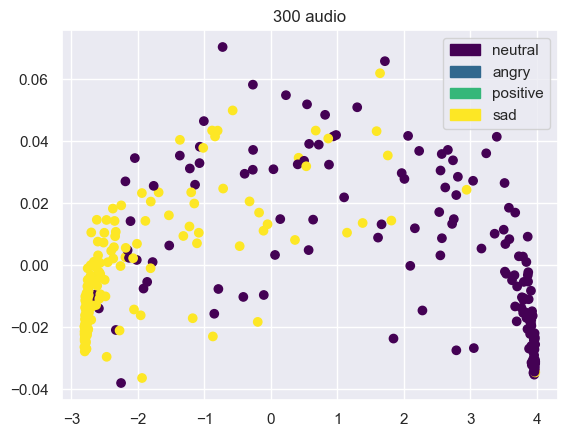

In [20]:
data, labels = get_logits_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d(data, labels, f"{n_samples * 2} audio")

## 2D

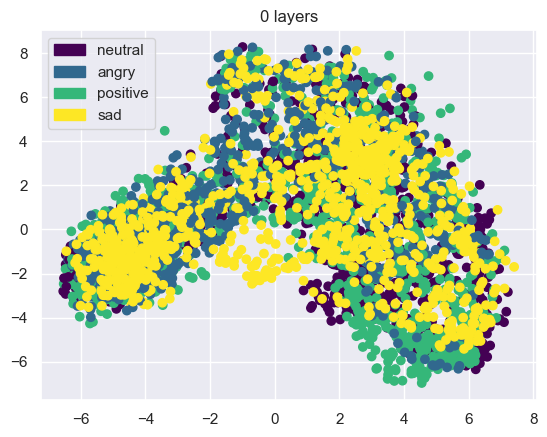

In [42]:
plot_2d(data, labels, "0 layers")

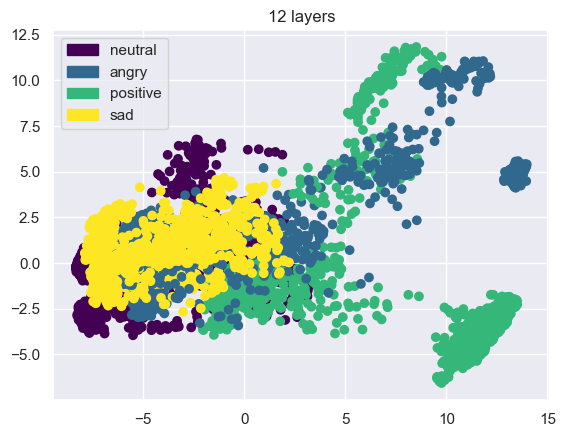

In [35]:
plot_2d(data, labels, "12 layers")

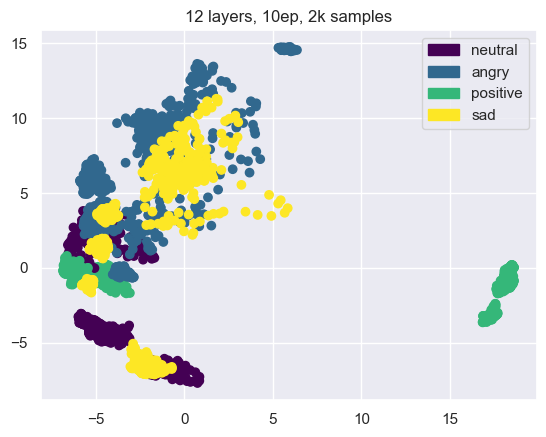

In [47]:
plot_2d(data, labels, "12 layers, 10ep, 2k samples")

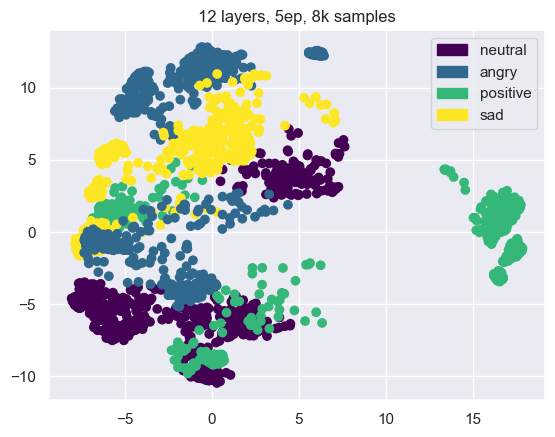

In [51]:
plot_2d(data, labels, "12 layers, 5ep, 8k samples")

## 3D

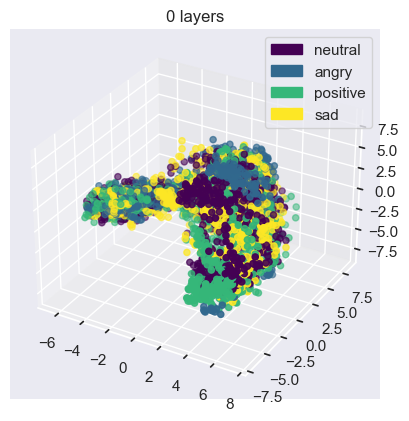

In [43]:
plot_3d(data, labels, "0 layers")

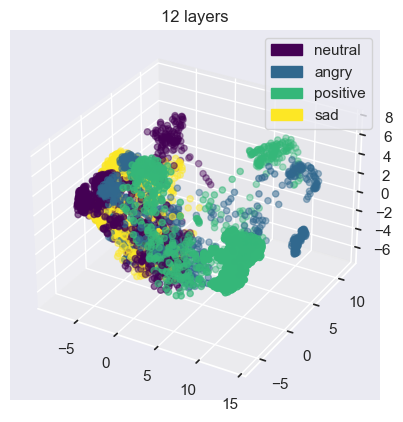

In [37]:
plot_3d(data, labels, "12 layers")

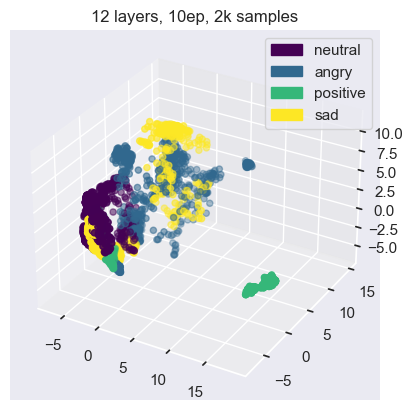

In [48]:
plot_3d(data, labels, "12 layers, 10ep, 2k samples")

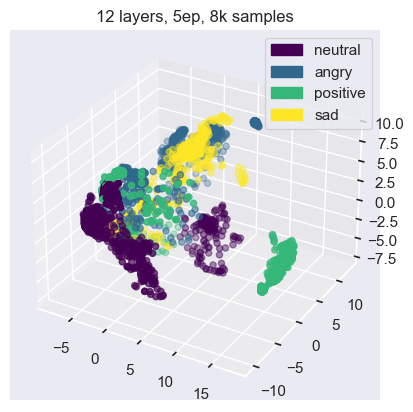

In [52]:
plot_3d(data, labels, "12 layers, 5ep, 8k samples")

### Средние значения признаков

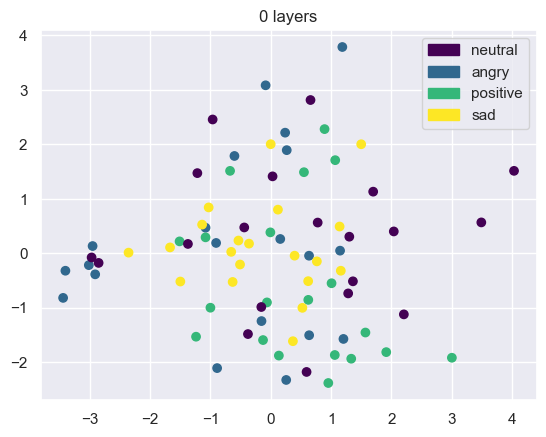

In [57]:
plot_2d(data, labels, "0 layers")

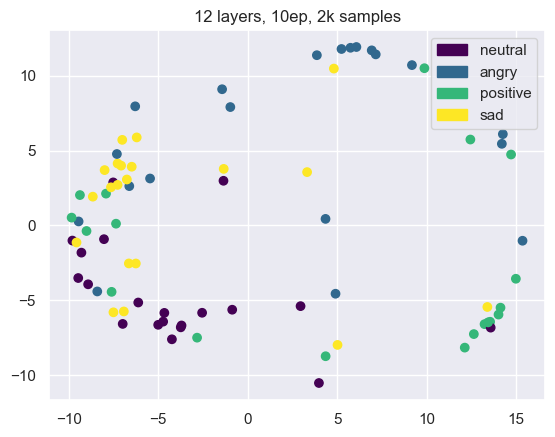

In [61]:
plot_2d(data, labels, "12 layers, 10ep, 2k samples")

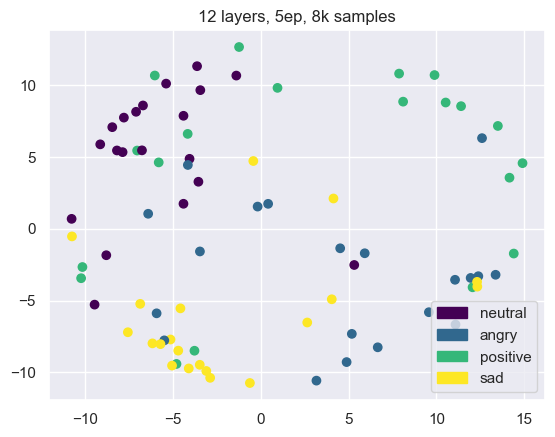

In [64]:
plot_2d(data, labels, "12 layers, 5ep, 8k samples")

### HuBERT с TripletLoss

In [18]:
# Получение массива со средними значениями признаков каждого аудиофайла
def get_mean_features_and_labels(df, model, feature_extractor, sampling_rate=16000):
    output = get_output_for_audio(f'../{df["audio_path"][0]}', feature_extractor, model, sampling_rate)
    hidden_state = output.last_hidden_state.detach().numpy()[0]
    hidden_state = hidden_state.mean(axis=0)

    features_list = [[hidden_state]]
    labels_list = [df['label'][0]]

    for index, row in df.iterrows():
        if (index == 0):
            continue
        
        output = get_output_for_audio(f'../{row["audio_path"]}', feature_extractor, model, sampling_rate)
        hidden_state = output.last_hidden_state.detach().numpy()[0]
        hidden_state = hidden_state.mean(axis=0)
        
        features_list.append([hidden_state])
        labels_list.append(row['label'])
    
    data = np.concatenate(features_list)
    labels = np.array(labels_list)
    
    return data, labels

# Получение массива со значениями признаков
def get_features_and_labels(df, model, feature_extractor, sampling_rate=16000):
    output = get_output_for_audio(f'../{df["audio_path"][0]}', feature_extractor, model, sampling_rate)
    hidden_state = output.last_hidden_state.detach().numpy()[0]
    
    features_list = [hidden_state]
    labels_list = [[df['label'][0] for _ in range(hidden_state.shape[0])]]

    for index, row in df.iterrows():
        if (index == 0):
            continue
        
        output = get_output_for_audio(f'../{row["audio_path"]}', feature_extractor, model, sampling_rate)
        hidden_state = output.last_hidden_state.detach().numpy()[0]

        features_list.append(hidden_state)
        labels_list.append([row['label'] for _ in range(hidden_state.shape[0])])
    
    data = np.concatenate(features_list)
    labels = np.concatenate(labels_list)
    
    return data, labels

In [29]:
def plot_2d_triple(data, labels, title=""):
    reducers = [
        PCA(n_components=2),
        umap.UMAP(),
        TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
    ]
    
    titles = ["PCA", "UMAP", "TSNE"]

    fig, ax = plt.subplots(1, 3)
    fig.set_figheight(4)
    fig.set_figwidth(12)
    for i in range(len(reducers)):
        reduced_data = reducers[i].fit_transform(data)
        ax[i].scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], c=labels, cmap='viridis')
        ax[i].legend(handles=get_patches())
        ax[i].set_title(titles[i])

    plt.tight_layout()
    plt.show()

In [14]:
models = [
    "models/triplets/hubert-base-dusha-ft-triplets-m1-mean",
    "models/triplets/hubert-base-dusha-ft-triplets-m05-mean",
    "models/triplets/hubert-base-dusha-ft-triplets-m5-mean",
    "models/triplets/custom-hubert-base-dusha-ft-triplets-m1-mean",
]

Some weights of the model checkpoint at facebook/hubert-base-ls960 were not used when initializing HubertModel: ['encoder.pos_conv_embed.conv.weight_g', 'encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertModel were not initialized from the model checkpoint at facebook/hubert-base-ls960 and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for pre

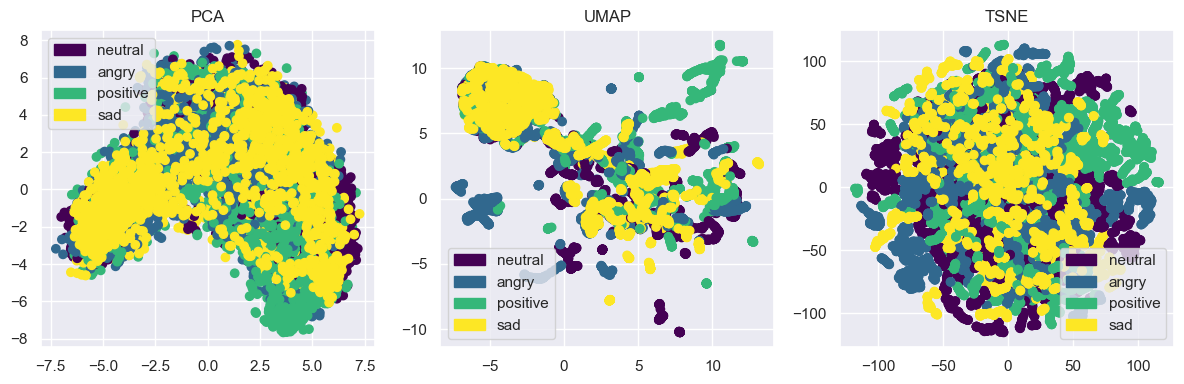

In [41]:
n_samples = 10
df_reduce = df.groupby(['emotion']).head(n_samples).reset_index(drop=True)

model = HubertModel.from_pretrained("facebook/hubert-base-ls960")
data, labels = get_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d_triple(data, labels)

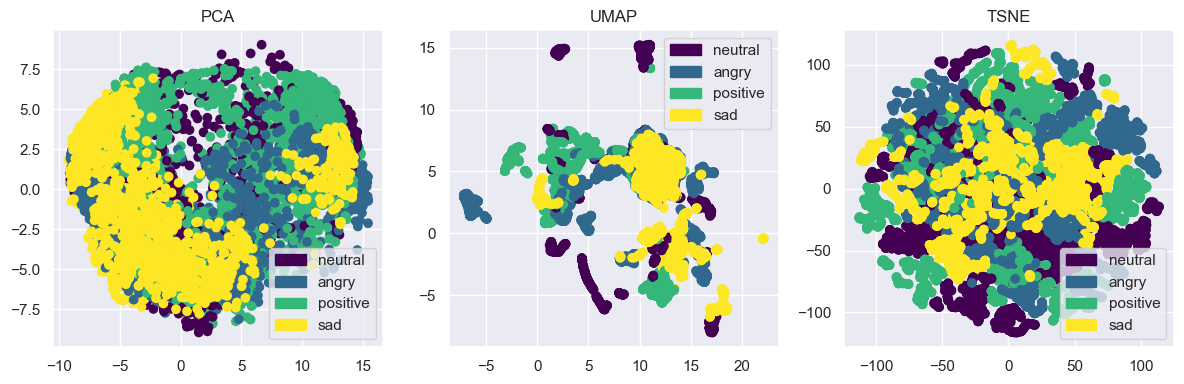

In [42]:
n_samples = 10
df_reduce = df.groupby(['emotion']).head(n_samples).reset_index(drop=True)

model = HubertModel.from_pretrained(models[2], local_files_only=True)
data, labels = get_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d_triple(data, labels)

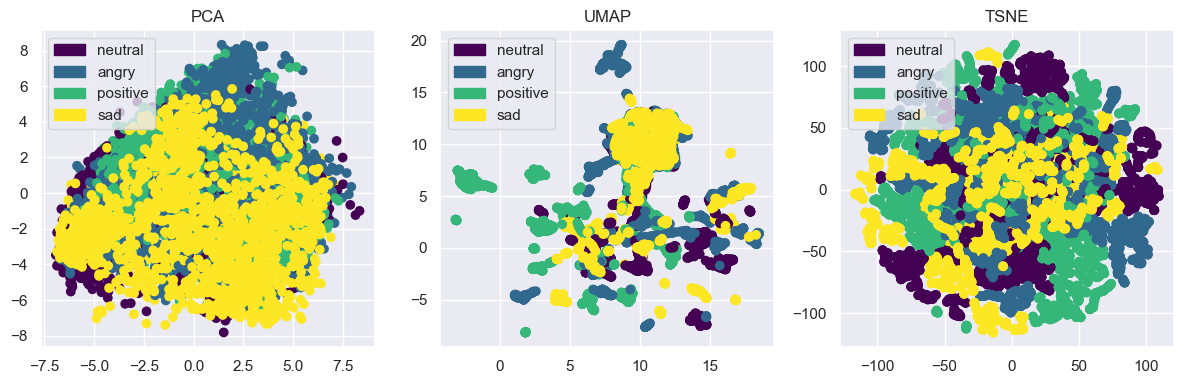

In [43]:
model = HubertModel.from_pretrained(models[0], local_files_only=True)
data, labels = get_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d_triple(data, labels)

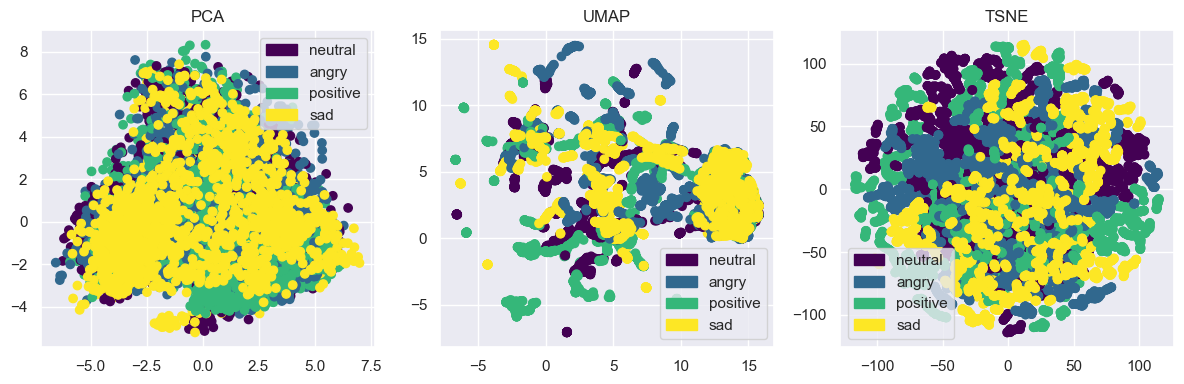

In [44]:
model = HubertModel.from_pretrained(models[1], local_files_only=True)
data, labels = get_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d_triple(data, labels)

### Средние значения признаков

In [35]:
n_samples = 200
df_reduce = df.groupby(['emotion']).head(n_samples).reset_index(drop=True)

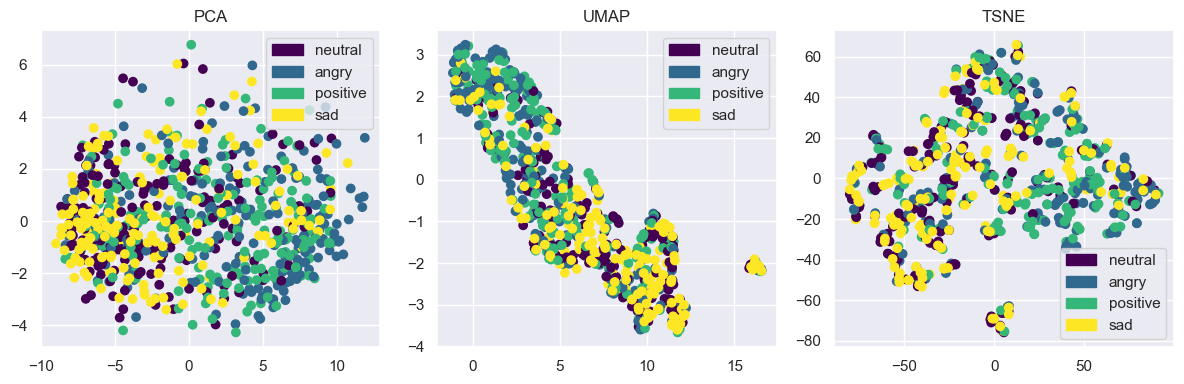

In [36]:
model = HubertModel.from_pretrained(models[2], local_files_only=True)
data, labels = get_mean_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d_triple(data, labels)

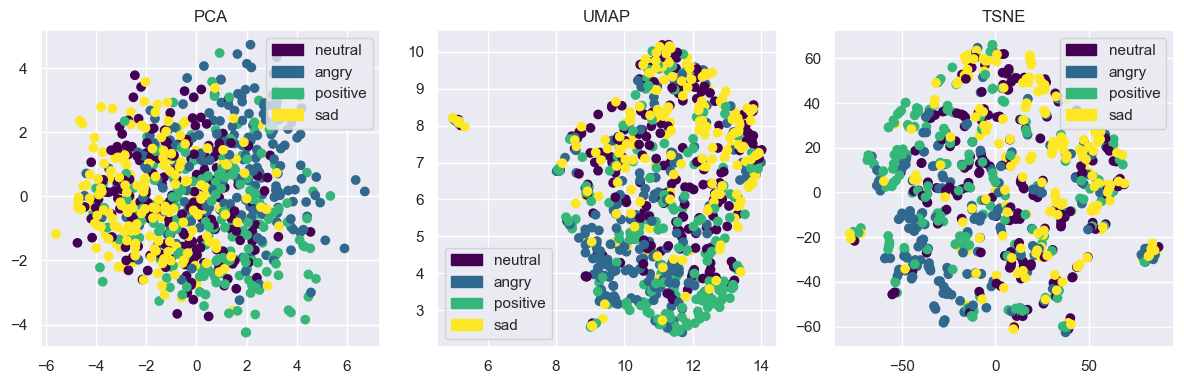

In [37]:
model = HubertModel.from_pretrained(models[0], local_files_only=True)
data, labels = get_mean_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d_triple(data, labels)

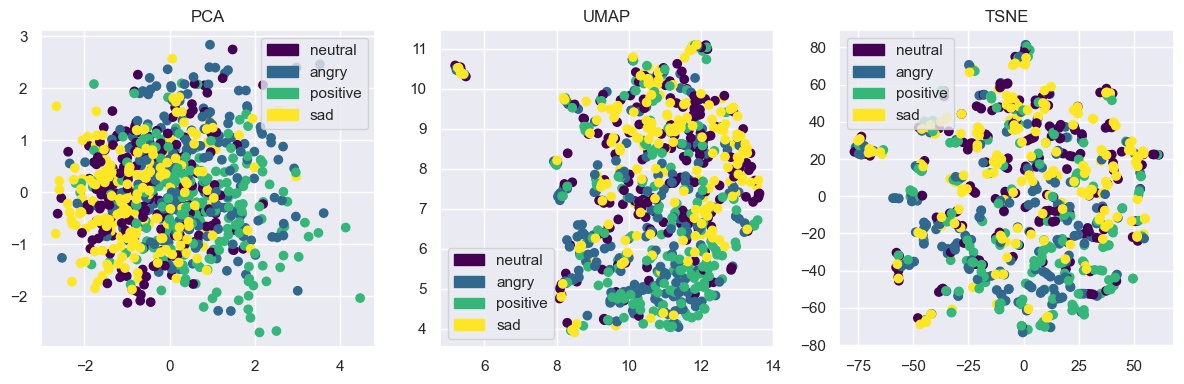

In [38]:
model = HubertModel.from_pretrained(models[1], local_files_only=True)
data, labels = get_mean_features_and_labels(df_reduce, model, feature_extractor, sampling_rate)
plot_2d_triple(data, labels)

In [9]:
# model = HubertModel.from_pretrained("facebook/hubert-base-ls960", output_hidden_states=True)
# model = HubertForSequenceClassification.from_pretrained(
#     "models/8000-samples/hubert-base-dusha-ft-12-layers-5ep-8k",
#     # "models/triplets/hubert-base-dusha-ft-triplets-m1-mean",
#     local_files_only=True,
#     output_hidden_states=True
# )

In [11]:
output_1 = get_output_for_audio(f"../{df['audio_path'][1]}", feature_extractor, model)
output_2 = get_output_for_audio(f"../{df['audio_path'][4]}", feature_extractor, model)
output_3 = get_output_for_audio(f"../{df['audio_path'][3]}", feature_extractor, model)

pdist = torch.nn.PairwiseDistance(p=2)
dist_1_2 = pdist(output_1.hidden_states[-1].mean(dim=1), output_2.hidden_states[-1].mean(dim=1))
dist_1_3 = pdist(output_1.hidden_states[-1].mean(dim=1), output_3.hidden_states[-1].mean(dim=1))
dist_2_3 = pdist(output_2.hidden_states[-1].mean(dim=1), output_3.hidden_states[-1].mean(dim=1))

print(dist_1_2, dist_1_3, dist_2_3)

tensor([23.1951], grad_fn=<NormBackward1>) tensor([10.4148], grad_fn=<NormBackward1>) tensor([23.4741], grad_fn=<NormBackward1>)


In [14]:
loss = torch.nn.TripletMarginLoss(margin=15.0)
loss(output_1.hidden_states[-1].mean(dim=1), output_3.hidden_states[-1].mean(dim=1), output_2.hidden_states[-1].mean(dim=1))

tensor(2.2197, grad_fn=<MeanBackward0>)